<a href="https://colab.research.google.com/github/shekhar-git-hub/Project-Space-Watch/blob/main/analyzing_visualizing_large_scale_satellite_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cloud optimized Geotiffs For the analysis of large scale datasets.**

We have used the satellite datas for 2019 of south america to analyze and visualize the georeferencing information considering it is already hosted on a priemium AWS S3 cloud storage. The datasets hosted is from EarthExplorer We can however use the available datasets of any location if hosted on premium cloud for large-scale datasets, it would not be a problem.

In [10]:
#Installations
!apt install gdal-bin python-gdal python3-gdal
!pip install rasterio
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  python3-pkg-resources python3-rtree
0 upgraded, 2 newly installed, 0 to remove and 22 not upgraded.
Need to get 116 kB of archives.
After this operation, 640 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-rtree all 0.8.3+ds-1 [16.9 kB]
Fetc

In [11]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

Access Cloud optimized Geotiffs with AWS

In [15]:
fpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/175/033/LC08_L1TP_175033_20201002_20201002_01_T1/LC08_L1TP_175033_20201002_20201002_01_T1_B4.TIF'

def rasterio_open(f):
    return rio.open(f)

src_image = rasterio_open(fpath)
print(src_image.profile)

RasterioIOError: ignored

The above error indcicates no data is hosted on aws for our location Itahari,Nepal.So we we will use the available hosted data file for south america on S3 cloud storage.

In [13]:
fpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B4.TIF'

def rasterio_open(f):
    return rio.open(f)

src_image = rasterio_open(fpath)
print(src_image.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32619), 'transform': Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [16]:
overview = src_image.overviews(1)[-1]
overview

81

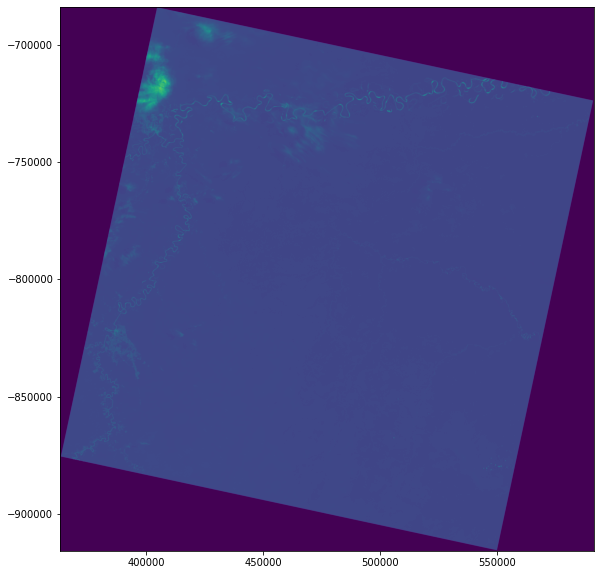

In [17]:
fig, ax = plt.subplots(1, figsize=(12,10))
show(src_image, ax=ax)
plt.show()

In [18]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype("f4")
src_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
src_image_array[src_image_array==0] = np.nan 

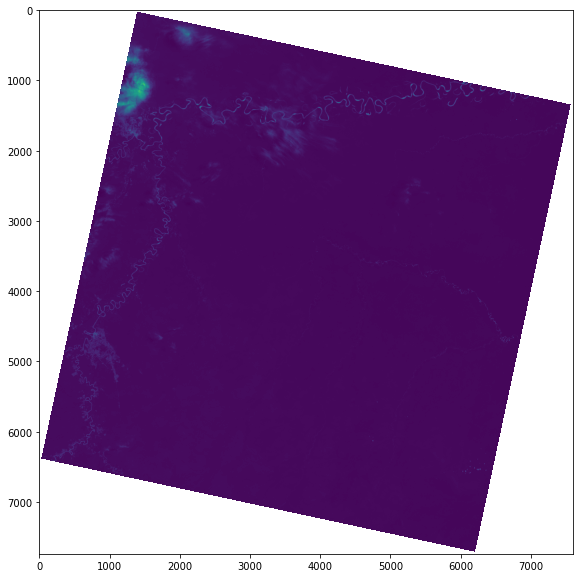

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image_array,ax=ax)
plt.show()

In [21]:
src_image.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32619), 'transform': Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

**Getting subset of the image**

Window(col_off, row_off, width, height)

In [24]:
window = rio.windows.Window(1200, 1200, 750, 850)

In [25]:
subset = src_image.read(1, window=window )

In [26]:
#subset.profile

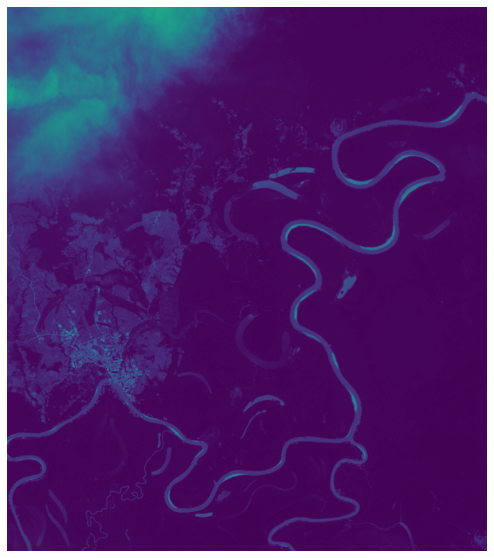

In [28]:
fig, ax = plt.subplots(1, figsize= (12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

***RGB***

In [34]:
rpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B4.TIF'
gpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B3.TIF'
bpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B2.TIF'

In [35]:
red = rio.open(rpath)
green = rio.open(gpath)
blue = rio.open(bpath)

In [36]:
red_array = red.read(1)
green_array = green.read(1)
blue_array = blue.read(1)

In [37]:
red.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32619), 'transform': Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [38]:
blue.height

7741

In [39]:
src_image.transform

Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0)

In [41]:
#Create an RGB image
with rio.open('RGB.tiff', 'w', driver = 'Gtiff', width = red.width, height = red.height, count = 3, crs= red.crs, transform=red.transform, dtype=red.dtypes[0]) as rgb:
    rgb.write(blue.read(1), 1)
    rgb.write(green.read(1), 2)
    rgb.write(red.read(1), 3)
    rgb.close()

In [42]:
rgb = rio.open("/content/RGB.tiff")

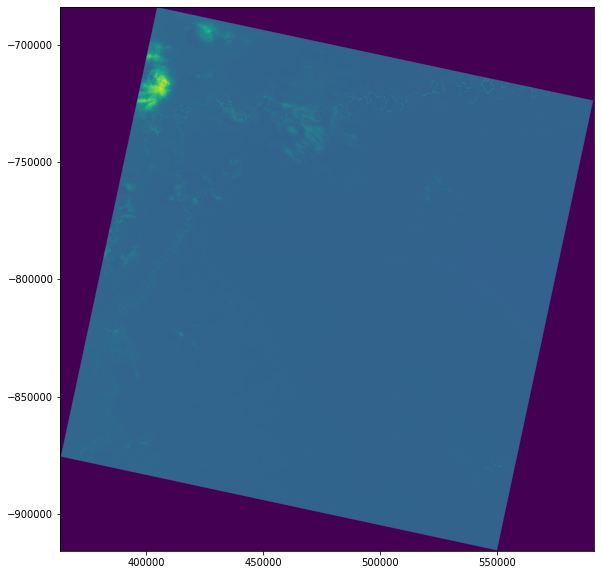

In [43]:
fix, ax = plt.subplots(1, figsize= (12, 10))
show(rgb, ax=ax, cmap="viridis")
plt.show()

These indepth analysis of the geographical information from the satellite imagery can help us analyze the different indepth factors and mitigate any critical situations which would greatly aid in our efforts to take immediate actions to sustain our planet.This analysis has been done for a particular location considering the time-constraints of the event however we can analyze with available satellite datasets for any location and wide variety of sustainable constriants.